In [25]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy as sc
import math

plots_dir = 'W:\\lab_winter\\private\\Experiments\\Matthias_MB\\2018\\MB18_56 QuantSeq merge analysis\\plots\\GSEA_plots\\'

In [2]:
# read in GSEA rnk & target gene set files
rnk = pd.read_csv('W:\\lab_winter\\private\\Experiments\\Matthias_MB\\2018\\MB18_56 QuantSeq merge analysis\\GSEA\\20190426_PC2_GSEA_Muhar_top100_MYC_targets\\PC2.rnk', header=None, names=['HGNC_name', 'ranking_score'], sep="\t")
target_results = pd.read_csv('W:\\lab_winter\\private\\Experiments\\Matthias_MB\\2018\\MB18_56 QuantSeq merge analysis\\GSEA\\20190426_PC2_GSEA_Muhar_top100_MYC_targets\\Muhar_top100_MYC_targets.grp.xls', sep="\t").dropna(axis=1)

target_results = target_results.rename(columns={'PROBE': 'HGNC_name', 'RANK IN GENE LIST': 'gene_rank', 'RANK METRIC SCORE': 'ranking_score', 'RUNNING ES': 'running_ES', 'CORE ENRICHMENT': 'core_enrichment'}).drop('NAME', axis=1)
rnk['index_column'] = rnk.index

zero_crossing = np.where(np.diff(np.sign(rnk.ranking_score)))[0]  ### this identifies the zero_crossing index


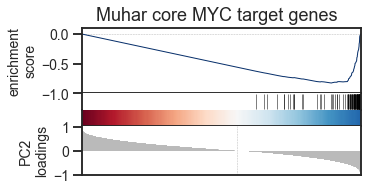

In [26]:
#### make all-in-one GSEA plot
plt.close('all')
sns.set_style('ticks')
sns.set_context('talk')

fig, ax = plt.subplots(5, figsize=(5,3), gridspec_kw={'height_ratios': [4,1,1,3,1], 'hspace': 0})

# lineplot
ax[0].axhline(0, linestyle='--', linewidth=.5, color='#bababa')
sns.lineplot(ax=ax[0], x=target_results.gene_rank.append(pd.Series(0)), y=target_results.running_ES.append(pd.Series(0)), linewidth=1, color='#08306b')
# vlines
ax[1].vlines(x=target_results.gene_rank, ymin=0, ymax=1, linewidth=.5, color='black') # this is if you want to color the target gene set in the waterfall plot
# colorbar
img = sns.heatmap(rnk.iloc[:,[1,2]], center=zero_crossing, cmap="RdBu", cbar_ax=ax[2], cbar_kws={'orientation': 'horizontal', 'ticks': []})
img.set_visible(False)
# waterfall
ax[3].axvline(zero_crossing, linestyle='--', linewidth=.5, color='#bababa')
ax[3].vlines(x=rnk.index, ymin=0, ymax=rnk.ranking_score, linewidth=.25, color='#bababa')


# control figure aesthetics
ax[2].set_frame_on(True)

sns.despine(ax=ax[0], top=False, right=False)
sns.despine(ax=ax[1], bottom=True, right=False)
sns.despine(ax=ax[2], right=False)
sns.despine(ax=ax[3], right=False)

ax[0].set_xlim(0,len(rnk))
ax[1].set_xlim(0,len(rnk))
ax[3].set_xlim(0,len(rnk))

ax[0].set_ylim(-1.0,0.1)

ax[0].set_xticks([])
ax[1].set_xticks([])
ax[3].set_xticks([])
#ax[3].set_xticks(np.arange(0,len(rnk), 2500))

ax[0].set_yticks(np.arange(-1.,0.1,0.5))
ax[1].set_yticks([])

ax[0].tick_params(labelsize=14)
ax[3].tick_params(labelsize=14)

# add titles
plt.suptitle('Muhar core MYC target genes', fontsize=18)
ax[0].set_ylabel('enrichment\nscore', fontsize=14)
ax[3].set_ylabel('PC2\nloadings', fontsize=14)


#plt.show()
plt.savefig(plots_dir + 'PC2_loadings_MuharMYCtargets_GSEA-plot.pdf', dpi=300)
plt.savefig(plots_dir + 'PC2_loadings_MuharMYCtargets_GSEA-plot.png', dpi=300)

In [ ]:
#### make waterfall plot
plt.close('all')
sns.set_style('ticks')
sns.set_context('talk')
plt.figure(figsize=(10,5))

plt.vlines(x=rnk.index, ymin=0, ymax=rnk.ranking_score, linewidth=.25, color='#bababa')
plt.vlines(x=target_results.gene_rank, ymin=0, ymax=target_results.ranking_score, linewidth=.25, color='darkred') # this is if you want to color the target gene set in the waterfall plot

plt.xlabel('rank')
plt.ylabel('log2FC (1h dTAG7 vs. control)')

plt.show()
#plt.savefig(plots_dir + 'TT-seq_1h_DE_waterfall\\{0}_1h_waterfall_all.pdf'.format(all_set_names[counter]), dpi=300)
#plt.savefig(plots_dir + 'TT-seq_1h_DE_waterfall\\{0}_1h_waterfall_all.png'.format(all_set_names[counter]), dpi=300)

In [ ]:
#### make colorbar
plt.close('all')
sns.set_style('ticks')
sns.set_context('talk')

zero_crossing = np.where(np.diff(np.sign(rnk.ranking_score)))[0]  ### this identifies the zero_crossing index

img = sns.heatmap(rnk.iloc[:,[1,2]], center=zero_crossing, cmap="RdBu", cbar_kws={'orientation': 'horizontal'})
img.set_visible(False)

plt.show()
#plt.savefig(plots_dir + 'TT-seq_1h_DE_waterfall\\{0}_1h_waterfall_all.pdf'.format(all_set_names[counter]), dpi=300)
#plt.savefig(plots_dir + 'TT-seq_1h_DE_waterfall\\{0}_1h_waterfall_all.png'.format(all_set_names[counter]), dpi=300)

In [ ]:
#### make all-in-one GSEA plot_no_vlines
plt.close('all')
sns.set_style('ticks')
sns.set_context('talk')

fig, ax = plt.subplots(4, figsize=(5,3), gridspec_kw={'height_ratios': [4,1,4,1], 'hspace': 0})

zero_crossing = np.where(np.diff(np.sign(rnk.ranking_score)))[0]  ### this identifies the zero_crossing index

# lineplot
sns.lineplot(ax=ax[0], x=target_results.gene_rank.append(pd.Series(0)), y=target_results.running_ES.append(pd.Series(0)), linewidth=1, color='#08306b')
# vlines
#ax[1].vlines(x=target_results.gene_rank, ymin=0, ymax=1, linewidth=.25, color='black') # this is if you want to color the target gene set in the waterfall plot
# colorbar
img = sns.heatmap(rnk.iloc[:,[1,2]], center=zero_crossing, cmap="RdBu", cbar_ax=ax[1], cbar_kws={'orientation': 'horizontal', 'ticks': []})
img.set_visible(False)
# waterfall
ax[2].vlines(x=rnk.index, ymin=0, ymax=rnk.ranking_score, linewidth=.25, color='#bababa')
ax[2].vlines(x=target_results.gene_rank, ymin=0, ymax=target_results.ranking_score, linewidth=.25, color='black') # this is if you want to color the target gene set in the waterfall plot


ax[1].set_frame_on(True)

sns.despine(ax=ax[0], bottom=True, top=False, right=False)
sns.despine(ax=ax[1], bottom=True, right=False)
sns.despine(ax=ax[2], right=False)

ax[0].set_xlim(0,len(rnk)+200)
ax[2].set_xlim(0,len(rnk)+200)

ax[0].set_xticks([])
ax[1].set_xticks([])

ax[1].set_yticks([])

plt.title('Muhar_top100_MYC-target_genes')

plt.show()


In [ ]:
#### make all-in-one GSEA plot_no_rnk-distribution
plt.close('all')
sns.set_style('ticks')
sns.set_context('talk')

fig, ax = plt.subplots(4, figsize=(5,3), gridspec_kw={'height_ratios': [4,1,1,1], 'hspace': 0})

zero_crossing = np.where(np.diff(np.sign(rnk.ranking_score)))[0]  ### this identifies the zero_crossing index

# lineplot
sns.lineplot(ax=ax[0], x=target_results.gene_rank.append(pd.Series(0)), y=target_results.running_ES.append(pd.Series(0)), linewidth=1, color='#08306b')
# vlines
ax[1].vlines(x=target_results.gene_rank, ymin=0, ymax=1, linewidth=.25, color='black') # this is if you want to color the target gene set in the waterfall plot
# colorbar
img = sns.heatmap(rnk.iloc[:,[1,2]], center=zero_crossing, cmap="RdBu", cbar_ax=ax[2], cbar_kws={'orientation': 'horizontal', 'ticks': []})
img.set_visible(False)
# waterfall
#ax[3].vlines(x=rnk.index, ymin=0, ymax=rnk.ranking_score, linewidth=.25, color='#bababa')
#ax[3].vlines(x=target_results.gene_rank, ymin=0, ymax=target_results.ranking_score, linewidth=.25, color='black') # this is if you want to color the target gene set in the waterfall plot

ax[2].set_frame_on(True)

sns.despine(ax=ax[0], top=False, right=False)
sns.despine(ax=ax[1], bottom=True, right=False)
sns.despine(ax=ax[2], right=False)

ax[0].set_xlim(0,len(rnk))
ax[1].set_xlim(0,len(rnk))
ax[3].set_xlim(0,len(rnk))

ax[0].set_xticks([])
ax[1].set_xticks([])

ax[0].set_yticks(np.arange(-1.,0.1,0.5))
ax[1].set_yticks([])

plt.show()
